# Data Preparation

In [ ]:
%cd /content/drive/MyDrive/AI/TemperatureForecast/

/content/drive/MyDrive/AI/TemperatureForecast


In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
http://history.openweathermap.org/data/2.5/history/city?q=100000,704&type=hour&start=20210101&end=20211231&appid={API key}f18a1c38c3eed7881a11372d3fd3687b

In [ ]:
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin
# !pip install selenium
# import sys
# sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
# from selenium import webdriver
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)
# wd.get("https://www.webite-url.com")

In [ ]:
%%writefile WeatherCrawler.py
import argparse
import requests, re, typing
from bs4 import BeautifulSoup as soup
import contextlib
import json

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)

def _remove(d:list) -> list:
   return list(filter(None, [re.sub('\xa0', '', b) for b in d]))

@contextlib.contextmanager
def get_weather_data(url:str, by_url = True) -> typing.Generator[dict, None, None]:
   d = soup(requests.get(url).text if by_url else url, 'html.parser')
   _table = d.find('table', {'id':'wt-his'})
   _data = [[[i.text for i in c.find_all('th')], *[i.text for i in c.find_all('td')]] for c in _table.find_all('tr')]
   [h1], [h2], *data, _ = _data
   _h2 = _remove(h2)
   yield {tuple(_remove(h1)):[dict(zip(_h2, _remove([a, *i]))) for [[a], *i] in data]}

def crawl_weather_by_month_year(wd, month:int,year:int)->dict:
    base_url = "https://www.timeanddate.com/weather/vietnam/hanoi/historic?month={month}&year={year}".format(month=month,year=year)
    wd.get(base_url)
    crawled_data = {}
    for i in wd.find_element(By.ID,'wt-his-select').find_elements(By.TAG_NAME,'option'):
        i.click()
        with get_weather_data(wd.page_source, False) as weather:
            crawled_data[i.text] = weather
    return crawled_data

def fahrenheit_to_celsius(temp)->int:
    return int((temp - 32) / 1.8)

def extract_crawled_data(crawled_data:dict)->dict:
    extracted_data = {}
    for day, day_data in crawled_data.items():
        weather_data=day_data[('Conditions','Comfort')]
        temp_humid = []
        for hourly_weather in weather_data:
            temp_data = hourly_weather['Temp']
            temperature = int(temp_data[:-2])
            if (temp_data[-1]=="F"):
                temperature = fahrenheit_to_celsius(temperature)
            humid = int(hourly_weather['Barometer'][:-1])
            temp_humid.append({"temperature":temperature, "humidity":humid,"time":hourly_weather['Time']})
        temp_humid[0]['time']="12:00 am"
        extracted_data[day]=temp_humid
    return extracted_data    

def save_to_file(extracted_data:dict, month:int, year:int):
    filename = "weather_{month}_{year}".format(month=month,year=year)
    with open(filename,"w") as f:
        json.dump(extracted_data,f,indent=2,ensure_ascii=False)


if __name__=="__main__":
    # create parser
    print("Parsing Args")
    parser = argparse.ArgumentParser()
    parser.add_argument("month")
    parser.add_argument("year")
    args = parser.parse_args()
 
    print("Start crawling weather data in {month}/{year}".format(month=args.month,year=args.year))
    month,year = int(args.month), int(args.year)
    crawled_data = crawl_weather_by_month_year(wd,month,year)
    extracted_data = extract_crawled_data(crawled_data)
    save_to_file(extracted_data,month,year)
    print("Done Crawling")

Writing WeatherCrawler.py


In [ ]:
!python3 WeatherCrawler.py 1 2021

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Parsing Args
Start crawling weather data in 1/2021
Done Crawling


In [ ]:
!python3 WeatherCrawler.py 2 2021 &
!python3 WeatherCrawler.py 3 2021 &
!python3 WeatherCrawler.py 4 2021 &
!python3 WeatherCrawler.py 5 2021 &
!python3 WeatherCrawler.py 6 2021 &
!python3 WeatherCrawler.py 7 2021 &
!python3 WeatherCrawler.py 8 2021 &
!python3 WeatherCrawler.py 9 2021 &
!python3 WeatherCrawler.py 10 2021 &
!python3 WeatherCrawler.py 11 2021 &
!python3 WeatherCrawler.py 12 2021 

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
WeatherCrawler.py:14: DeprecationWarning: use options instead of chrome_options
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
Parsing Args
Start crawling weather data in 2/2021
WeatherCrawler.py:32: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  for i in wd.find_element_by_id('wt-his-select').find_elements_by_tag_name('option'):
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
Done Crawling
/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or cha

In [ ]:
# wd.get('https://www.timeanddate.com/weather/vietnam/hanoi/historic?month=12&year=2021')
from selenium.webdriver.common.by import By
_d = {}
for i in wd.find_element(By.ID,'wt-his-select').find_elements(By.TAG_NAME,'option'):
  i.click()
  with get_weather_data(wd.page_source, False) as weather:
    _d[i.text] = weather

In [ ]:
import requests, re, typing
from bs4 import BeautifulSoup as soup
import contextlib
def _remove(d:list) -> list:
   return list(filter(None, [re.sub('\xa0', '', b) for b in d]))

@contextlib.contextmanager
def get_weather_data(url:str, by_url = True) -> typing.Generator[dict, None, None]:
   d = soup(requests.get(url).text if by_url else url, 'html.parser')
   _table = d.find('table', {'id':'wt-his'})
   _data = [[[i.text for i in c.find_all('th')], *[i.text for i in c.find_all('td')]] for c in _table.find_all('tr')]
   [h1], [h2], *data, _ = _data
   _h2 = _remove(h2)
   yield {tuple(_remove(h1)):[dict(zip(_h2, _remove([a, *i]))) for [[a], *i] in data]}

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
!pwd
filename="check.json"
with open(filename, "w") as f:
    json.dump(_d,f,indent=2,ensure_ascii=False)

/content/drive/MyDrive/AI/TemperatureForecast


In [ ]:
import json
filename = "test_12_2021.json"
with open(filename,"w") as f:
    json.dump(extracted_data,f,indent=2,ensure_ascii=False)


In [ ]:
def fahrenheit_to_celsius(temp)->int:
    return int((temp - 32) / 1.8)

extracted_data = {}
for day, day_data in _d.items():
    weather_data=day_data[('Conditions','Comfort')]
    temp_humid = []
    print("Extracting {day}".format(day=day))
    for hourly_weather in weather_data:
        temp_data = hourly_weather['Temp']
        temperature = int(temp_data[:-2])
        if (temp_data[-1]=="F"):
            temperature = fahrenheit_to_celsius(temperature)
        try :          
            humid = int(hourly_weather['Barometer'][:-1])
        except:
            print("Error in {time}:humidity = {humid}".format(time=hourly_weather['Time'],humid=hourly_weather['Barometer']))

        temp_humid.append({"temperature":temperature, "humidity":humid,"time":hourly_weather['Time']})
    temp_humid[0]['time']="12:00 am"
    extracted_data[day]=temp_humid

extracted_data

Extracting December 1, 2021
Extracting December 2, 2021
Extracting December 3, 2021
Extracting December 4, 2021
Extracting December 5, 2021
Extracting December 6, 2021
Extracting December 7, 2021
Extracting December 8, 2021
Error in 4:30 am:humidity = N/A
Error in 5:00 am:humidity = N/A
Error in 5:30 am:humidity = N/A
Extracting December 9, 2021
Extracting December 10, 2021
Extracting December 11, 2021
Extracting December 12, 2021
Extracting December 13, 2021
Extracting December 14, 2021
Extracting December 15, 2021
Extracting December 16, 2021
Extracting December 17, 2021
Extracting December 18, 2021
Extracting December 19, 2021
Extracting December 20, 2021
Extracting December 21, 2021
Extracting December 22, 2021
Extracting December 23, 2021
Extracting December 24, 2021
Extracting December 25, 2021
Extracting December 26, 2021
Extracting December 27, 2021
Extracting December 28, 2021
Extracting December 29, 2021
Extracting December 30, 2021
Extracting December 31, 2021


{'December 1, 2021': [{'humidity': 77, 'temperature': 15, 'time': '12:00 am'},
  {'humidity': 77, 'temperature': 15, 'time': '12:30 am'},
  {'humidity': 88, 'temperature': 13, 'time': '1:00 am'},
  {'humidity': 94, 'temperature': 13, 'time': '1:30 am'},
  {'humidity': 100, 'temperature': 12, 'time': '2:00 am'},
  {'humidity': 100, 'temperature': 12, 'time': '2:30 am'},
  {'humidity': 100, 'temperature': 12, 'time': '3:00 am'},
  {'humidity': 100, 'temperature': 12, 'time': '3:30 am'},
  {'humidity': 94, 'temperature': 13, 'time': '4:00 am'},
  {'humidity': 88, 'temperature': 13, 'time': '4:30 am'},
  {'humidity': 88, 'temperature': 13, 'time': '5:00 am'},
  {'humidity': 88, 'temperature': 13, 'time': '5:30 am'},
  {'humidity': 88, 'temperature': 13, 'time': '6:00 am'},
  {'humidity': 88, 'temperature': 13, 'time': '6:30 am'},
  {'humidity': 94, 'temperature': 13, 'time': '7:30 am'},
  {'humidity': 88, 'temperature': 13, 'time': '8:00 am'},
  {'humidity': 88, 'temperature': 13, 'time': 

In [ ]:
_d

{'December 1, 2021': {('Conditions',
   'Comfort'): [{'Barometer': '77%',
    'Humidity': '↑',
    'Temp': '59°F',
    'Time': '12:00 amFri, Dec 31',
    'Visibility': '30.30 "Hg',
    'Weather': 'Overcast.',
    'Wind': '9 mph'}, {'Barometer': '77%',
    'Humidity': '↑',
    'Temp': '59°F',
    'Time': '12:30 am',
    'Visibility': '30.30 "Hg',
    'Weather': 'Mostly cloudy.',
    'Wind': '8 mph'}, {'Barometer': '88%',
    'Humidity': '↑',
    'Temp': '57°F',
    'Time': '1:00 am',
    'Visibility': '30.30 "Hg',
    'Weather': 'Overcast.',
    'Wind': '8 mph'}, {'Barometer': '94%',
    'Humidity': '↑',
    'Temp': '57°F',
    'Time': '1:30 am',
    'Visibility': '30.30 "Hg',
    'Weather': 'Rain. Mostly cloudy.',
    'Wind': '8 mph'}, {'Barometer': '100%',
    'Humidity': '↑',
    'Temp': '55°F',
    'Time': '2:00 am',
    'Visibility': '30.30 "Hg',
    'Weather': 'Light rain. Fog.',
    'Wind': '6 mph'}, {'Barometer': '100%',
    'Humidity': '↑',
    'Temp': '55°F',
    'Time': '2:30

In [ ]:
link = "https://www.timeanddate.com/weather/vietnam/hanoi/historic?month={month}&year={year}".format(month=1,year=2021)
base_url = "https://www.wunderground.com/history/daily/vn/soc-son/VVNB/date/{year}-{month}-{day}".format(year=2022,month=1,day=20)
base_url = "https://www.wunderground.com/history/daily/vn/soc-son/VVNB/date/2022-1-23"

In [ ]:
from bs4 import BeautifulSoup, NavigableString, Tag
import requests
# proxies = "117.2.28.235:55443"
web_content = requests.get(base_url)
soup = BeautifulSoup(web_content.content, "html.parser")
table = soup.find_all('tbody')
# if names_obj == None :
#     continue
# names = names_obj.attrs["title"]    
# contents= soup.find("div", class_="job-data")
# td_tag = table[1].find_all('td',{'class': ''})
# table[1].find_all('th')
# num_tag = len(td_tag)
# temp_humid = []
# for i in range(0,num_tag,4):
#     data = {} 
#     data['temp']=td_tag[i].get_text()[0:-3]
#     data['hum']=td_tag[i+2].get_text()[:-1]
#     temp_humid.append(data)
# temp_humid

In [ ]:
soup

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/Organization" lang="en" prefix="og: http://ogp.me/ns#"><head itemscope="" itemtype="http://schema.org/WebSite">
<meta charset="utf-8"/>
<title>Soc Son, Vietnam Weather History | Weather Underground</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//widgets.outbrain.com" rel="dns-prefetch"/>
<link href="//odb.outbrain.com" rel="dns-prefetch"/>
<link href="//c.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//s.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//aax.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//partner.googleadservices.com" rel="dns-prefetch"/>
<link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
<link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
<link href="//h.nexac.com" rel="dns-prefetch"/>
<link href="//js-sec.indexww.com" rel="dns-prefetch"/>
<link href="//s

In [ ]:
from lxml.html import fromstring
import requests
from itertools import cycle
import traceback
def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    # print(response.text)
    parser = fromstring(response.text)
    proxies = set()
    print(parser)
    print(parser.xpath('//tbody/tr'))
    for i in parser.xpath('//tbody/tr')[:]:
        if i.xpath('.//td[7][contains(text(),"yes")]') and i.xpath('.//td[5][contains(text(),"elite proxy")]'):
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return proxies

proxies = get_proxies()
print(proxies)

<Element html at 0x7f66673b80b0>
[<Element tr at 0x7f66673b8290>, <Element tr at 0x7f66673b82f0>, <Element tr at 0x7f66673b8350>, <Element tr at 0x7f66673b83b0>, <Element tr at 0x7f6668010c50>, <Element tr at 0x7f6668010cb0>, <Element tr at 0x7f66680107d0>, <Element tr at 0x7f666739f350>, <Element tr at 0x7f666739f590>, <Element tr at 0x7f666229fdd0>, <Element tr at 0x7f666229fbf0>, <Element tr at 0x7f666229fad0>, <Element tr at 0x7f666229fcb0>, <Element tr at 0x7f6660a1c950>, <Element tr at 0x7f6660a1c8f0>, <Element tr at 0x7f6660a1cd70>, <Element tr at 0x7f6660a1c6b0>, <Element tr at 0x7f6660a1cc50>, <Element tr at 0x7f6660a25d70>, <Element tr at 0x7f6660a25bf0>, <Element tr at 0x7f6660a25a70>, <Element tr at 0x7f6660a25f50>, <Element tr at 0x7f6660a25d10>, <Element tr at 0x7f6660a25a10>, <Element tr at 0x7f6660a25ad0>, <Element tr at 0x7f6660a25e90>, <Element tr at 0x7f6660a25b90>, <Element tr at 0x7f6660a25e30>, <Element tr at 0x7f6660a5f350>, <Element tr at 0x7f6660978ef0>, <Eleme

In [ ]:
# table = soup.find_all('tbody')
print(web_content.content)
soup

b'<!DOCTYPE html><html lang="en" itemscope="" itemtype="http://schema.org/Organization" prefix="og: http://ogp.me/ns#"><head itemscope="" itemtype="http://schema.org/WebSite">\n  <meta charset="utf-8">\n  <title>Soc Son, Vietnam Weather History | Weather Underground</title>\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n  <link rel="dns-prefetch" href="//widgets.outbrain.com">\n  <link rel="dns-prefetch" href="//odb.outbrain.com">\n  <link rel="dns-prefetch" href="//c.amazon-adsystem.com">\n  <link rel="dns-prefetch" href="//s.amazon-adsystem.com">\n  <link rel="dns-prefetch" href="//aax.amazon-adsystem.com">\n  <link rel="dns-prefetch" href="//partner.googleadservices.com">\n  <link rel="dns-prefetch" href="//tpc.googlesyndication.com">\n  <link rel="dns-prefetch" href="//pagead2.googlesyndication.com">\n  <link rel="dns-prefetch" href="//h.nexac.com">\n  <link rel="dns-prefetch" href="//js-sec

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/Organization" lang="en" prefix="og: http://ogp.me/ns#"><head itemscope="" itemtype="http://schema.org/WebSite">
<meta charset="utf-8"/>
<title>Soc Son, Vietnam Weather History | Weather Underground</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//widgets.outbrain.com" rel="dns-prefetch"/>
<link href="//odb.outbrain.com" rel="dns-prefetch"/>
<link href="//c.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//s.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//aax.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//partner.googleadservices.com" rel="dns-prefetch"/>
<link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
<link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
<link href="//h.nexac.com" rel="dns-prefetch"/>
<link href="//js-sec.indexww.com" rel="dns-prefetch"/>
<link href="//s

In [ ]:
from datetime import time

def get_hour_min(time_str:str):
    _hour,_min = time_str.split(":")
    _hour= int(_hour)
    _min = int(_min[0:2])
    return _hour,_min

def fahrenheit_to_celsius(temp):
    return (temp - 32) / 1.8

def extract_weather_data(weather_data):
    temp, humidity = weather_data[1].get_text().replace("\xa0"," ").split(" "), float(weather_data[5].get_text()[:-1])
    temperature,unit = temp[0],temp[1]
    temperature = float(temperature)
    if (unit[-1]=="F"):
        temperature = fahrenheit_to_celsius(temperature)
    return temperature, humidity

temp_hum = [{'time':time(hour=12,minute=00)}]
one_day_data = table[1].find_all('tr')
temp_hum[0]['temperature'],temp_hum[0]["humidity"] = extract_weather_data(one_day_data[0].find_all('td'))
for hourly_data in one_day_data[1:]:
    _hour,_min = get_hour_min(hourly_data.find('th').get_text())

    weather = hourly_data.find_all('td')
    temperature, humidity = extract_weather_data(weather)
    
    temp_hum.append({"time": time(hour=int(_hour),minute=int(_min)),"temperature":temperature,"humidity":humidity})
temp_hum

[{'humidity': 63.0, 'temperature': 12.0, 'time': datetime.time(12, 0)},
 {'humidity': 67.0, 'temperature': 11.0, 'time': datetime.time(12, 30)},
 {'humidity': 67.0, 'temperature': 11.0, 'time': datetime.time(1, 0)},
 {'humidity': 67.0, 'temperature': 11.0, 'time': datetime.time(1, 30)},
 {'humidity': 71.0, 'temperature': 10.0, 'time': datetime.time(2, 0)},
 {'humidity': 67.0, 'temperature': 10.0, 'time': datetime.time(2, 30)},
 {'humidity': 62.0, 'temperature': 10.0, 'time': datetime.time(3, 0)},
 {'humidity': 58.0, 'temperature': 10.0, 'time': datetime.time(3, 30)},
 {'humidity': 54.0, 'temperature': 10.0, 'time': datetime.time(4, 0)},
 {'humidity': 54.0, 'temperature': 10.0, 'time': datetime.time(4, 30)},
 {'humidity': 62.0, 'temperature': 9.0, 'time': datetime.time(5, 0)},
 {'humidity': 54.0, 'temperature': 9.0, 'time': datetime.time(5, 30)},
 {'humidity': 50.0, 'temperature': 9.0, 'time': datetime.time(6, 0)},
 {'humidity': 43.0, 'temperature': 10.0, 'time': datetime.time(6, 30)},


In [ ]:
test[1].get_text().replace("\xa0"," ").split(" ")

['12', '°C']

# Crawl with API

In [ ]:
https://api.weather.com/v1/location/VVNB:9:VN/observations/historical.json?apiKey=e1f10a1e78da46f5b10a1e78da96f525&units=m&startDate=20210219
APIKey = "e1f10a1e78da46f5b10a1e78da96f525"

In [ ]:
%%writefile DateTimeHandlerInterface.py
class DateTimeHandlerInterface:
    def convert_timestampe(self, timestamp)->str:
        pass

    def get_num_days_of_year(self,year)->int:
        pass

    def get_date_from_day_num(self,year,day_num,str_format)->str:
        pass
    

Overwriting DateTimeHandlerInterface.py


In [ ]:
%%writefile VietNamDateTimeHandler.py
from DateTimeHandlerInterface import DateTimeHandlerInterface
import datetime
from datetime import timezone, timedelta
class VietNamDateTimeHandler(DateTimeHandlerInterface):
    def convert_timestampe(self, timestamp)->str:
        return datetime.datetime.fromtimestamp(timestamp,tz=timezone(timedelta(hours=7))).strftime("%Y-%m-%d %H:%M:%S")

    def get_num_days_of_year(self,year)->int:
        return ((datetime.date(year,12,31)-datetime.date(year,1,1)).days+1)

    def get_date_from_day_num(self,year,day_num,str_format)->str:
        return datetime.datetime.strptime(str(year) + "-" + str(day_num), "%Y-%j").strftime(str_format)     
    

Overwriting VietNamDateTimeHandler.py


In [ ]:
%%writefile AbstractHourlyWeatherCrawler.py
from abc import ABC, abstractmethod
import datetime, calendar
from VietNamDateTimeHandler import VietNamDateTimeHandler
class AbstractHourlyWeatherCrawler(ABC):
    def __init__(self,year):
        self.year=year
        self.APIKey = "e1f10a1e78da46f5b10a1e78da96f525"
        self.base_url = "https://api.weather.com/v1/location/{location}/observations/historical.json?apiKey={apiKey}&units=m&startDate={date}"\
        .format(location="{location}",apiKey=self.APIKey,date="{date}")
        self.year_data={}
        self.date_time_handler = VietNamDateTimeHandler()

    def get_year_data(self)->list:
        location_url = self.get_location_url()
        if not self.year_data:
            self.year_data = []
            n_days = self.date_time_handler.get_num_days_of_year(self.year)
            for i in range(1,n_days+1):
                # str_date = self.get_date_from_day_num(i,"%Y%m%d")
                # str_key_date = self.get_date_from_day_num(i,"%Y-%m-%d")
                self.year_data.extend(self.get_hourly_data(location_url,i))
        return self.year_data

    @abstractmethod
    def get_location_url(self)->str:
        pass

    @abstractmethod
    def get_hourly_data(self,location_url,day)->list:
        pass

Overwriting AbstractHourlyWeatherCrawler.py


In [ ]:
%%writefile NoiBaiHourlyWeatherCrawler.py
from AbstractHourlyWeatherCrawler import AbstractHourlyWeatherCrawler
from bs4 import BeautifulSoup
import requests
import json
class NoiBaiHourlyWeatherCrawler(AbstractHourlyWeatherCrawler):

    def __init__(self,year):
        super().__init__(year)
        self.time_range=self.get_time_observation_range()

    def get_time_observation_range(self)->list:
        time_range=[]
        mins = ["00","30"]
        for i in range(24):
            for min in mins:
                time_range.append(f"{i:02d}:{min:s}:00")
        return time_range

    def index_time(self,day,time_range)->dict:
        time_idx ={}
        for idx, _time in enumerate(time_range):
            time_idx[f"{day:s} {_time:s}"]=idx
        return time_idx
     
    def get_location_url(self)->str:
        return self.base_url.format(location="VVNB:9:VN",date="{date}")

    def init_observation(self,time_idx):
        len_observation = len(time_idx)
        observation = [{"time":None, "temp":None,"humidity":None} for i in range(len_observation)]
        for _time, idx in time_idx.items():
            observation[idx]["time"] = _time
        return observation
    
    def get_hourly_data(self,location_url,day_num)->list:
        str_key_date = self.date_time_handler.get_date_from_day_num(self.year,day_num,"%Y-%m-%d")
        
        api_day = self.date_time_handler.get_date_from_day_num(self.year,day_num,"%Y%m%d")
        api_url = location_url.format(date=api_day)
        web = requests.get(api_url)
        soup = BeautifulSoup(web.content, "html.parser")
        json_soup = json.loads(soup.get_text())

        time_idx = self.index_time(str_key_date,self.time_range)
        observations=self.init_observation(time_idx)
        try :
            for ele in json_soup["observations"]:
                date_time = self.date_time_handler.convert_timestampe(ele["valid_time_gmt"])
                try :
                    observations[time_idx[date_time]]["temp"] = ele["temp"]
                    observations[time_idx[date_time]]["humidity"] = ele["rh"]
                except:
                    print(f"DateTime {date_time:s} is out of scope")
        except :
            print(f"Observations Error in day: {str_key_date:s}")
        return observations

Overwriting NoiBaiHourlyWeatherCrawler.py


In [ ]:
%%writefile main.py
from NoiBaiHourlyWeatherCrawler import NoiBaiHourlyWeatherCrawler
import pandas as pd
import argparse

def save_to_file(weather_data:list,filename:str):
    _filename = f"data/{filename:s}"
    df = pd.DataFrame.from_dict(weather_data)
    df.to_csv(_filename,mode="a",header=False)


if __name__=="__main__":
    # create parser
    print("Parsing Args")
    parser = argparse.ArgumentParser()
    parser.add_argument("year")
    parser.add_argument("filename")
    args = parser.parse_args()
 
    print("Start crawling weather data in {year}".format(year=args.year))
    year = int(args.year)
    crawler = NoiBaiHourlyWeatherCrawler(year) 
    weather_data = crawler.get_year_data()
    print("Done Crawling.\nStart Saving ",args.filename)
    save_to_file(weather_data,args.filename)
    print("Done Saving")
    

Overwriting main.py


In [ ]:
# !mkdir data
# !python3 main.py 2005 weather2005.csv
# with open("data/weather.csv","w") as f:
#     f.writelines("time,temp,humidity\n")
%%bash
nohup python3 main.py 2005 weather2005.csv > weather2005.out 2> weather2005.err &
nohup python3 main.py 2006 weather2006.csv > weather2006.out 2> weather2006.err &
nohup python3 main.py 2007 weather2007.csv > weather2007.out 2> weather2007.err &
nohup python3 main.py 2009 weather2009.csv > weather2009.out 2> weather2009.err &
nohup python3 main.py 2015 weather2015.csv > weather2015.out 2> weather2015.err &

In [ ]:
%%bash
nohup python3 main.py 2005 weather2005.csv > weather2005.out 2> weather2005.err &
nohup python3 main.py 2006 weather2006.csv > weather2006.out 2> weather2006.err &
nohup python3 main.py 2007 weather2007.csv > weather2007.out 2> weather2007.err &
nohup python3 main.py 2008 weather2008.csv > weather2008.out 2> weather2008.err &
nohup python3 main.py 2009 weather2009.csv > weather2009.out 2> weather2009.err &
nohup python3 main.py 2010 weather2010.csv > weather2010.out 2> weather2010.err &
nohup python3 main.py 2011 weather2011.csv > weather2011.out 2> weather2011.err &
nohup python3 main.py 2012 weather2012.csv > weather2012.out 2> weather2012.err &
nohup python3 main.py 2013 weather2013.csv > weather2013.out 2> weather2013.err &
nohup python3 main.py 2014 weather2014.csv > weather2014.out 2> weather2014.err &
nohup python3 main.py 2015 weather2015.csv > weather2015.out 2> weather2015.err &
nohup python3 main.py 2016 weather2016.csv > weather2016.out 2> weather2016.err &
nohup python3 main.py 2017 weather2017.csv > weather2017.out 2> weather2017.err &
nohup python3 main.py 2018 weather2018.csv > weather2018.out 2> weather2018.err &
nohup python3 main.py 2019 weather2019.csv > weather2019.out 2> weather2019.err &
nohup python3 main.py 2020 weather2020.csv > weather2020.out 2> weather2020.err &

In [ ]:
with open("data/weather.csv","w") as f:
    f.writelines("time,temperature,humidity\n")

In [ ]:
%%bash
for i in {2007..2021}
do
   python3 main.py $i weather0721.csv
done

Parsing Args
Start crawling weather data in 2007
DateTime 2007-01-08 15:10:00 is out of scope
DateTime 2007-01-24 16:29:00 is out of scope
DateTime 2007-02-14 09:21:00 is out of scope
DateTime 2007-02-21 14:01:00 is out of scope
DateTime 2007-02-21 15:40:00 is out of scope
DateTime 2007-02-21 16:09:00 is out of scope
DateTime 2007-02-28 13:12:00 is out of scope
DateTime 2007-06-10 23:59:00 is out of scope
DateTime 2007-07-14 15:31:00 is out of scope
DateTime 2007-08-05 03:14:00 is out of scope
DateTime 2007-08-07 14:00:00 is out of scope
DateTime 2007-10-01 17:59:00 is out of scope
Done Crawling.
Start Saving  weather0721.csv
Done Saving
Parsing Args
Start crawling weather data in 2008
DateTime 2008-02-04 14:02:00 is out of scope
DateTime 2008-03-30 08:05:00 is out of scope
DateTime 2008-07-17 20:50:00 is out of scope
Done Crawling.
Start Saving  weather0721.csv
Done Saving
Parsing Args
Start crawling weather data in 2009
DateTime 2009-03-05 13:17:00 is out of scope
Done Crawling.
Star

In [44]:
%cd /content/drive/MyDrive/AI/TemperatureForecast/
!ls data
import pandas as pd
df = pd.read_csv("data/temp_weather1721.csv")
df.head(10)

/content/drive/MyDrive/AI/TemperatureForecast
temp_weather1721.csv  weather0721.csv  weather.csv


,Unnamed: 0,time,temp,humidity
0,0,2007-01-01 00:00:00,18.0,88.0
1,1,2007-01-01 00:30:00,18.0,83.0
2,2,2007-01-01 01:00:00,18.0,88.0
3,3,2007-01-01 01:30:00,18.0,88.0
4,4,2007-01-01 02:00:00,18.0,88.0
5,5,2007-01-01 02:30:00,18.0,88.0
6,6,2007-01-01 03:00:00,18.0,88.0
7,7,2007-01-01 03:30:00,18.0,88.0
8,8,2007-01-01 04:00:00,18.0,83.0
9,9,2007-01-01 04:30:00,18.0,83.0


In [ ]:
import numpy as np
copied_day = "2015-10-29 "
days= ["2015-10-30 ","2015-10-31 ","2015-11-01 ","2015-11-02 "]
time_range=[]
mins = ["00","30"]
for i in range(24):
    for min in mins :
        time_range.append(f"{i:02d}:{min:s}:00")

for tr in time_range:
    for day in days:
        time_to_fill = day+tr
        time_for_fill = copied_day+tr
        print(f"Copying {time_for_fill:s} to {time_to_fill:s}")
        idx = np.flatnonzero(df["time"]==time_to_fill)[0]
        idx2= np.flatnonzero(df["time"]==time_for_fill)[0]
        temp = df.iloc[idx2]["temp"]
        humidity = df.iloc[idx2]["humidity"]
        print(f"At {time_for_fill:s}: temp = {temp:f}, hum = {humidity:f}")
        df.loc[df.time==time_to_fill,"temp"]=temp
        df.loc[df.time==time_to_fill,"humidity"]=humidity
        print(f"Check after copy. Time {time_to_fill:s}: ",end="")
        print(df.loc[df.time==time_to_fill,"temp"])

Copying 2015-10-29 00:00:00 to 2015-10-30 00:00:00
At 2015-10-29 00:00:00: temp = 26.000000, hum = 83.000000
Check after copy. Time 2015-10-30 00:00:00: 14496    26.0
Name: temp, dtype: float64
Copying 2015-10-29 00:00:00 to 2015-10-31 00:00:00
At 2015-10-29 00:00:00: temp = 26.000000, hum = 83.000000
Check after copy. Time 2015-10-31 00:00:00: 14544    26.0
Name: temp, dtype: float64
Copying 2015-10-29 00:00:00 to 2015-11-01 00:00:00
At 2015-10-29 00:00:00: temp = 26.000000, hum = 83.000000
Check after copy. Time 2015-11-01 00:00:00: 14592    26.0
Name: temp, dtype: float64
Copying 2015-10-29 00:00:00 to 2015-11-02 00:00:00
At 2015-10-29 00:00:00: temp = 26.000000, hum = 83.000000
Check after copy. Time 2015-11-02 00:00:00: 14640    26.0
Name: temp, dtype: float64
Copying 2015-10-29 00:30:00 to 2015-10-30 00:30:00
At 2015-10-29 00:30:00: temp = 26.000000, hum = 83.000000
Check after copy. Time 2015-10-30 00:30:00: 14497    26.0
Name: temp, dtype: float64
Copying 2015-10-29 00:30:00 to

In [ ]:
# print(df.loc[df["time"]=="2015-10-29 17:30:00"]["temp"])
# print(df.loc[df["time"]=="2015-10-30 17:30:00"]["temp"])
# print(df.loc[df["time"]=="2015-11-01 17:30:00"]["temp"])
# print(df.loc[df["time"]=="2015-11-02 17:30:00"]["temp"])
# df.to_csv("data")

14483    30.0
Name: temp, dtype: float64
14531    30.0
Name: temp, dtype: float64
14627    30.0
Name: temp, dtype: float64
14675    30.0
Name: temp, dtype: float64


In [45]:
df.count()

Unnamed: 0    262992
time          262992
temp          259881
humidity      258941
dtype: int64

In [47]:
df = df.fillna(method='ffill')

In [59]:
df["temperature"].isnull().values.any()
why_nan = df[df.isna().any(axis=1)]
print(why_nan.count())
why_nan.head(10)
# df.loc[df.time=="2008-02-10 10:00:00","temp"]=11
# df.to_csv("data/filled_weather0721.csv")

In [ ]:
from datetime import datetime,timezone,timedelta
print(datetime.fromtimestamp(1104514200,tz=timezone(timedelta(hours=7))).strftime("%Y-%m-%d %H:%M:%S"))

2005-01-01 00:30:00


# Analysis

In [50]:
df = pd.read_csv("data/filled_weather0721.csv")

In [53]:
import datetime
# Converting the dt column to datetime object 
df['time'] = [datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['time']]

# Sorting by the date 
df.sort_values('time', inplace=True)
print(f"First date {min(df['time'])}")
print(f"Most recent date {max(df['time'])}")

First date 2007-01-01 00:00:00
Most recent date 2021-12-31 23:30:00


In [63]:
features = ['temp', 'humidity']

# Creating the data column
df['date'] = [x.date() for x in df['time']]

df[features].describe()

,temp,humidity
count,262992.000000,262992.000000
mean,24.400541,77.453843
std,5.744766,15.794014
min,5.000000,3.000000
25%,20.000000,66.000000
50%,25.000000,79.000000
75%,28.000000,89.000000
max,41.000000,100.000000


## Half-Hourly Data Plot

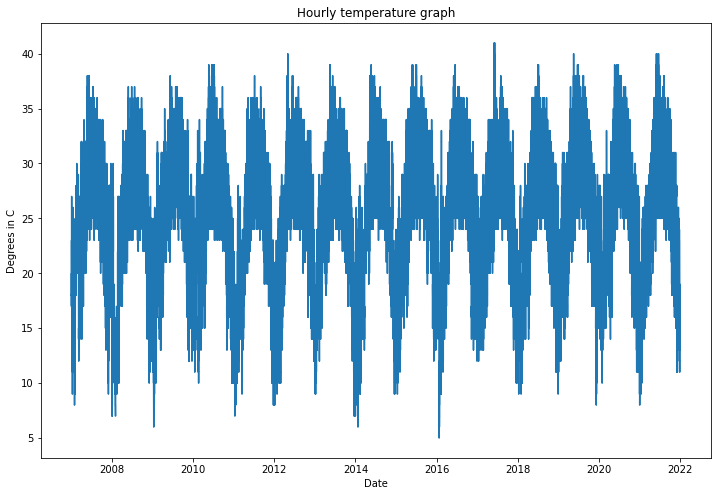

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot('time', 'temp', data=df)
plt.title('Hourly temperature graph')
plt.ylabel('Degrees in C')
plt.xlabel('Date')
plt.show()

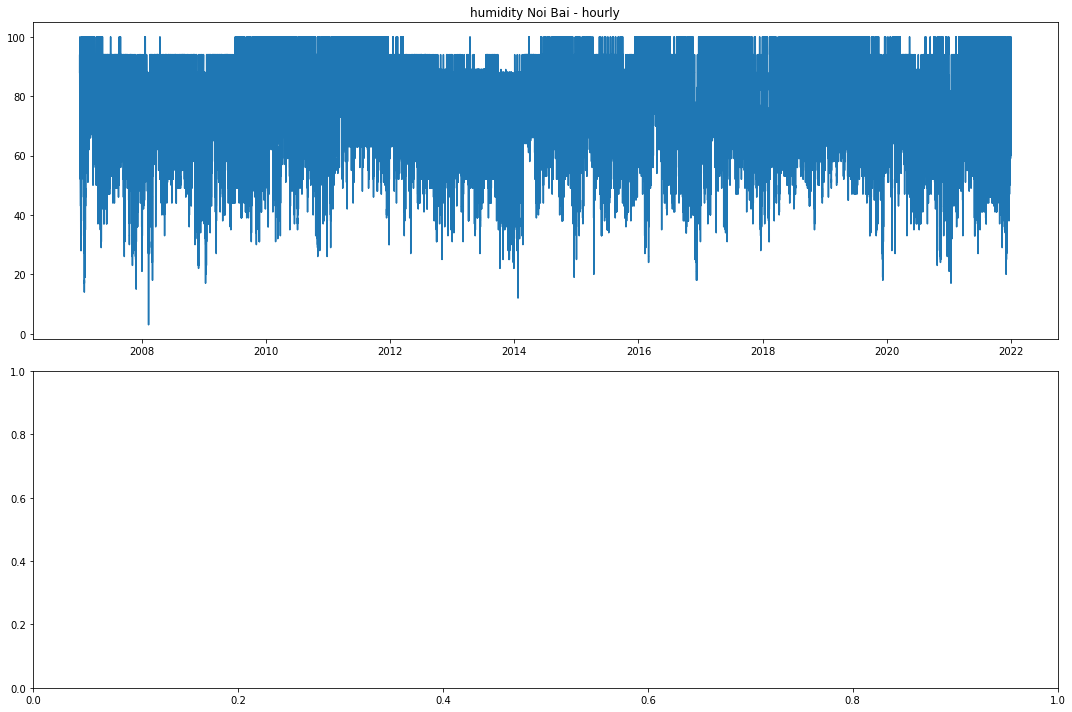

In [61]:
plot_features = df[features]
plot_features.index = df.time

fig, axes = plt.subplots(
    nrows=2, 
    ncols=1, 
    figsize=(15, 10), 
    facecolor="w", 
    edgecolor="k"
)

for i, feature in enumerate(['humidity']):
    axes[i % 2].plot(plot_features[feature])
    axes[i % 2].set_title(f'{feature} Noi Bai - hourly')
        
plt.tight_layout()

plt.show()

## Daily Data

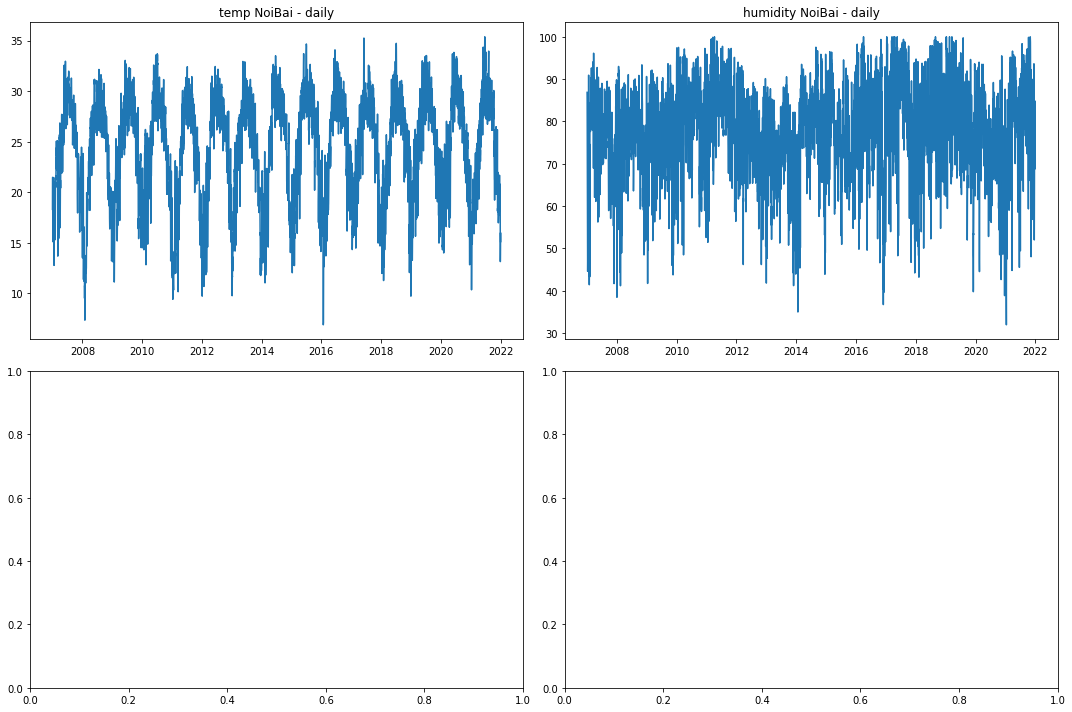

In [64]:
plot_features = df.groupby('date')[features].mean()

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    figsize=(15, 10), 
    facecolor="w", 
    edgecolor="k"
)

for i, feature in enumerate(features):
    axes[i // 2, i % 2].plot(plot_features[feature])
    axes[i // 2, i % 2].set_title(f'{feature} NoiBai - daily')
        
plt.tight_layout()

plt.show()

## Heatmaps

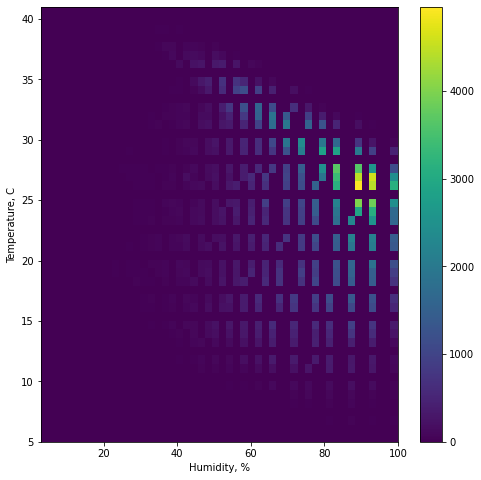

In [66]:
plt.figure(figsize=(8, 8))
plt.hist2d(df['humidity'], df['temp'], bins=(50, 50))
plt.colorbar()
ax = plt.gca()
plt.xlabel('Humidity, %')
plt.ylabel('Temperature, C')
ax.axis('tight')
plt.show()

## Feature Engineering

In [67]:
# Extracting the hour of day
df['hour'] = [x.hour for x in df['time']]

# Extracting the month of the year 
df['month'] = [x.month for x in df['time']]

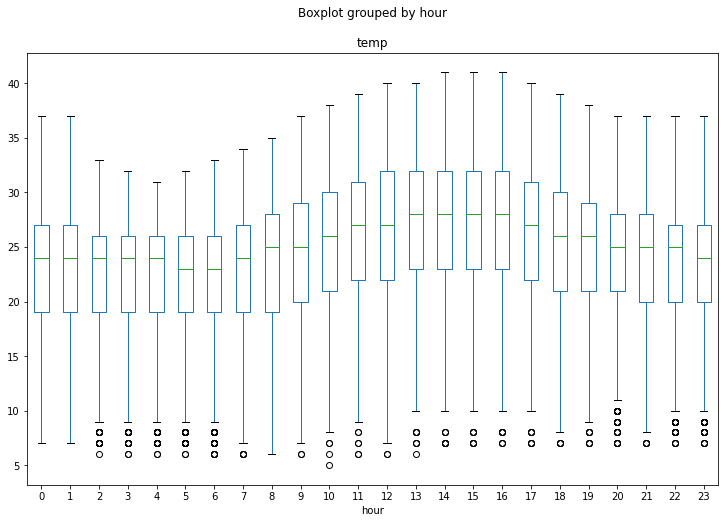

In [68]:
df.boxplot('temp', by='hour', figsize=(12, 8), grid=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


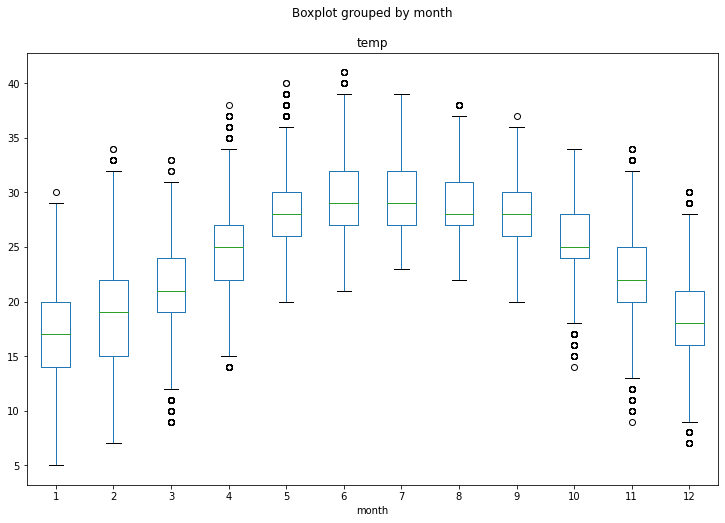

In [69]:
df.boxplot('temp', by='month', figsize=(12, 8), grid=False)

In [70]:
# Creating the cyclical daily feature 
df['day_cos'] = [np.cos(x * (2 * np.pi / 24)) for x in df['hour']]
df['day_sin'] = [np.sin(x * (2 * np.pi / 24)) for x in df['hour']]

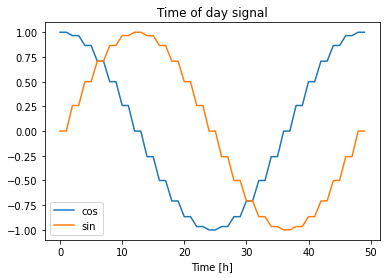

In [75]:
# Ploting the first 25 hours 
plt.plot(np.array(df['day_cos'])[:50], label='cos')
plt.plot(np.array(df['day_sin'])[:50], label='sin')
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.legend()
plt.show()

In [76]:
# Extracting the timestamp from the datetime object 
df['timestamp'] = [x.timestamp() for x in df['time']]

# Seconds in day 
s = 24 * 60 * 60 

# Seconds in year 
year = (365.25) * s

df['month_cos'] = [np.cos((x) * (2 * np.pi / year)) for x in df['timestamp']]
df['month_sin'] = [np.sin((x) * (2 * np.pi / year)) for x in df['timestamp']]

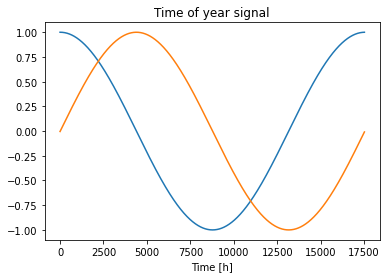

In [78]:
# Ploting the first year
plt.plot(np.array(df['month_cos'])[:48 * 365])
plt.plot(np.array(df['month_sin'])[:48 * 365])
plt.xlabel('Time [h]')
plt.title('Time of year signal')
plt.show()

## Single Step Forecast

### Hyper Parameter

In [79]:
# Number of lags (hours back) to use for models
lag = 48

# Steps ahead to forecast 
n_ahead = 1

# Share of obs in testing 
test_share = 0.1

# Epochs for training
epochs = 20

# Batch size 
batch_size = 512

# Learning rate
lr = 0.001

# Number of neurons in LSTM layer
n_layer = 10

# The features used in the modeling 
features_final = ['temp', 'day_cos', 'day_sin', 'month_sin', 'month_cos', 'humidity']

### Creating the matrices for learning

In [80]:
df[features_final].head(10)

,temp,day_cos,day_sin,month_sin,month_cos,humidity
0,18.0,1.000000,0.000000,-0.004301,0.999991,88.0
1,18.0,1.000000,0.000000,-0.003942,0.999992,83.0
2,18.0,0.965926,0.258819,-0.003584,0.999994,88.0
3,18.0,0.965926,0.258819,-0.003225,0.999995,88.0
4,18.0,0.866025,0.500000,-0.002867,0.999996,88.0
5,18.0,0.866025,0.500000,-0.002509,0.999997,88.0
6,18.0,0.707107,0.707107,-0.002150,0.999998,88.0
7,18.0,0.707107,0.707107,-0.001792,0.999998,88.0
8,18.0,0.500000,0.866025,-0.001434,0.999999,83.0
9,18.0,0.500000,0.866025,-0.001075,0.999999,83.0


In [81]:
def create_X_Y(ts: np.array, lag=1, n_ahead=1, target_index=0) -> tuple:
    """
    A method to create X and Y matrix from a time series array for the training of 
    deep learning models 
    """
    # Extracting the number of features that are passed from the array 
    n_features = ts.shape[1]
    
    # Creating placeholder lists
    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag - n_ahead):
            Y.append(ts[(i + lag):(i + lag + n_ahead), target_index])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an RNN input shape 
    X = np.reshape(X, (X.shape[0], lag, n_features))

    return X, Y

In [82]:
# Subseting only the needed columns 
ts = df[features_final]

nrows = ts.shape[0]

# Spliting into train and test sets
train = ts[0:int(nrows * (1 - test_share))]
test = ts[int(nrows * (1 - test_share)):]

# Scaling the data 
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

# Creating the final scaled frame 
ts_s = pd.concat([train, test])

In [83]:
X, Y = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead)

n_ft = X.shape[2]

In [84]:
# Spliting into train and test sets 
Xtrain, Ytrain = X[0:int(X.shape[0] * (1 - test_share))], Y[0:int(X.shape[0] * (1 - test_share))]
Xval, Yval = X[int(X.shape[0] * (1 - test_share)):], Y[int(X.shape[0] * (1 - test_share)):]

In [85]:
print(f"Shape of training data: {Xtrain.shape}")
print(f"Shape of the target data: {Ytrain.shape}")

print(f"Shape of validation data: {Xval.shape}")
print(f"Shape of the validation target data: {Yval.shape}")

Shape of training data: (236648, 48, 6)
Shape of the target data: (236648, 1)
Shape of validation data: (26295, 48, 6)
Shape of the validation target data: (26295, 1)


### Defining the model

In [86]:
import seaborn as sns 

# Random sampling
import random

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Concatenate, SimpleRNN, Masking, Flatten
from keras import losses
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal

In [87]:
class NNMultistepModel():
    
    def __init__(
        self, 
        X, 
        Y, 
        n_outputs,
        n_lag,
        n_ft,
        n_layer,
        batch,
        epochs, 
        lr,
        Xval=None,
        Yval=None,
        mask_value=-999.0,
        min_delta=0.001,
        patience=5
    ):
        lstm_input = Input(shape=(n_lag, n_ft))

        # Series signal 
        lstm_layer = LSTM(n_layer, activation='relu')(lstm_input)

        x = Dense(n_outputs)(lstm_layer)
        
        self.model = Model(inputs=lstm_input, outputs=x)
        self.batch = batch 
        self.epochs = epochs
        self.n_layer=n_layer
        self.lr = lr 
        self.Xval = Xval
        self.Yval = Yval
        self.X = X
        self.Y = Y
        self.mask_value = mask_value
        self.min_delta = min_delta
        self.patience = patience

    def trainCallback(self):
        return EarlyStopping(monitor='loss', patience=self.patience, min_delta=self.min_delta)

    def train(self):
        # Getting the untrained model 
        empty_model = self.model
        
        # Initiating the optimizer
        optimizer = keras.optimizers.Adam(learning_rate=self.lr)

        # Compiling the model
        empty_model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

        if (self.Xval is not None) & (self.Yval is not None):
            history = empty_model.fit(
                self.X, 
                self.Y, 
                epochs=self.epochs, 
                batch_size=self.batch, 
                validation_data=(self.Xval, self.Yval), 
                shuffle=False,
                callbacks=[self.trainCallback()]
            )
        else:
            history = empty_model.fit(
                self.X, 
                self.Y, 
                epochs=self.epochs, 
                batch_size=self.batch,
                shuffle=False,
                callbacks=[self.trainCallback()]
            )
        
        # Saving to original model attribute in the class
        self.model = empty_model
        
        # Returning the training history
        return history
    
    def predict(self, X):
        return self.model.predict(X)

In [88]:
model = NNMultistepModel(
    X=Xtrain,
    Y=Ytrain,
    n_outputs=n_ahead,
    n_lag=lag,
    n_ft=n_ft,
    n_layer=n_layer,
    batch=batch_size,
    epochs=epochs, 
    lr=lr,
    Xval=Xval,
    Yval=Yval,
)

In [89]:
model.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 6)]           0         
                                                                 
 lstm (LSTM)                 (None, 10)                680       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = model.train()

Epoch 1/20
463/463 [==============================] - 17s 33ms/step - loss: 0.3626 - val_loss: 0.3011
Epoch 2/20
463/463 [==============================] - 16s 35ms/step - loss: 0.1815 - val_loss: 0.1556
Epoch 3/20
463/463 [==============================] - 15s 32ms/step - loss: 0.1223 - val_loss: 0.1109
Epoch 4/20
463/463 [==============================] - 17s 36ms/step - loss: 0.1142 - val_loss: 0.1096
Epoch 5/20
463/463 [==============================] - 16s 35ms/step - loss: 0.1045 - val_loss: 0.1030
Epoch 6/20
463/463 [==============================] - 15s 32ms/step - loss: 0.1023 - val_loss: 0.1039
Epoch 7/20
463/463 [==============================] - 15s 32ms/step - loss: 0.0990 - val_loss: 0.1031
Epoch 8/20
463/463 [==============================] - 15s 33ms/step - loss: 0.0961 - val_loss: 0.0959
Epoch 9/20
463/463 [==============================] - 15s 32ms/step - loss: 0.0926 - val_loss: 0.0973
Epoch 10/20
463/463 [==============================] - 15s 32ms/step - loss: 0.091

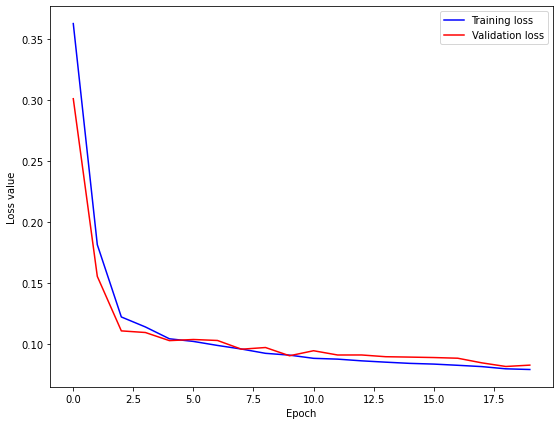

In [91]:
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

n_epochs = range(len(loss))

plt.figure(figsize=(9, 7))
plt.plot(n_epochs, loss, 'r', label='Training loss', color='blue')
if val_loss is not None:
    plt.plot(n_epochs, val_loss, 'r', label='Validation loss', color='red')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

In [92]:
# Comparing the forecasts with the actual values
yhat = [x[0] for x in model.predict(Xval)]
y = [y[0] for y in Yval]

In [95]:
# Creating the frame to store both predictions
days = df['time'].values[-len(y):]

frame = pd.concat([
    pd.DataFrame({'day': days, 'temp': y, 'type': 'original'}),
    pd.DataFrame({'day': days, 'temp': yhat, 'type': 'forecast'})
])

# Creating the unscaled values column
frame['temp_absolute'] = [(x * train_std['temp']) + train_mean['temp'] for x in frame['temp']]

# Pivoting
pivoted = frame.pivot_table(index='day', columns='type')
pivoted.columns = ['_'.join(x).strip() for x in pivoted.columns.values]
pivoted['res'] = pivoted['temp_absolute_original'] - pivoted['temp_absolute_forecast']
pivoted['res_abs'] = [abs(x) for x in pivoted['res']]

In [96]:
pivoted.tail(10)

,temp_forecast,temp_original,temp_absolute_forecast,temp_absolute_original,res,res_abs
day,,,,,,
2021-12-31 19:00:00,-1.368497,-1.447741,16.455834,16.0,-0.455834,0.455834
2021-12-31 19:30:00,-1.382088,-1.447741,16.377653,16.0,-0.377653,0.377653
2021-12-31 20:00:00,-1.386639,-1.447741,16.351479,16.0,-0.351479,0.351479
2021-12-31 20:30:00,-1.378351,-1.447741,16.399149,16.0,-0.399149,0.399149
2021-12-31 21:00:00,-1.371813,-1.447741,16.436761,16.0,-0.436761,0.436761
2021-12-31 21:30:00,-1.363884,-1.447741,16.482368,16.0,-0.482368,0.482368
2021-12-31 22:00:00,-1.359638,-1.447741,16.506793,16.0,-0.506793,0.506793
2021-12-31 22:30:00,-1.356259,-1.447741,16.526233,16.0,-0.526233,0.526233
2021-12-31 23:00:00,-1.353966,-1.447741,16.539423,16.0,-0.539423,0.539423


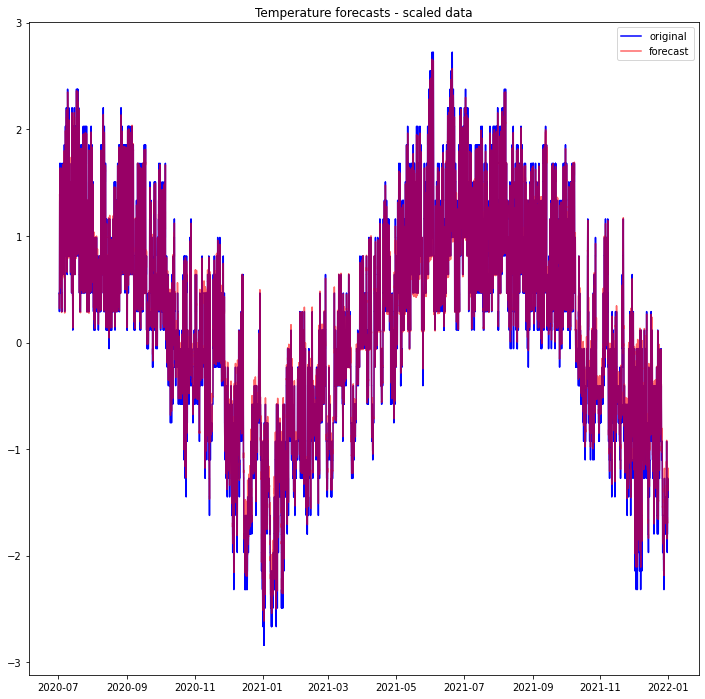

In [97]:
plt.figure(figsize=(12, 12))
plt.plot(pivoted.index, pivoted.temp_original, color='blue', label='original')
plt.plot(pivoted.index, pivoted.temp_forecast, color='red', label='forecast', alpha=0.6)
plt.title('Temperature forecasts - scaled data')
plt.legend()
plt.show()

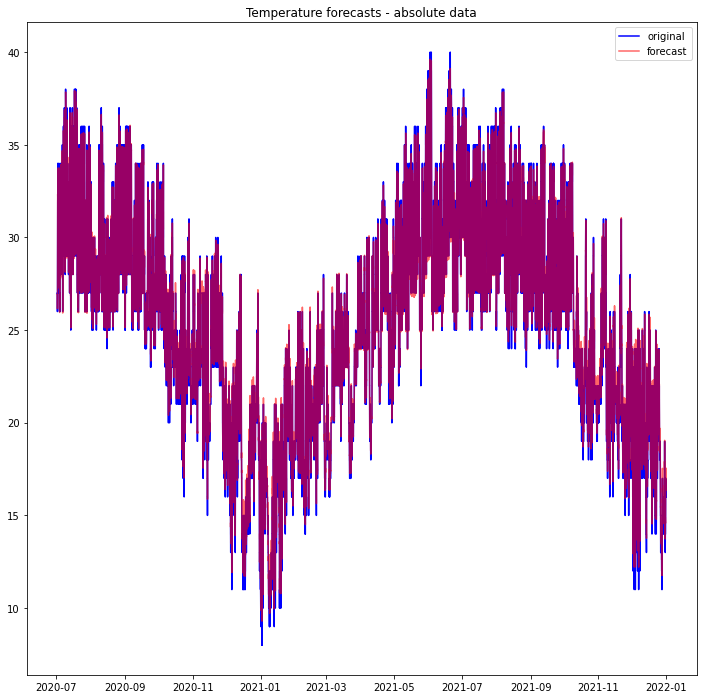

In [98]:
plt.figure(figsize=(12, 12))
plt.plot(pivoted.index, pivoted.temp_absolute_original, color='blue', label='original')
plt.plot(pivoted.index, pivoted.temp_absolute_forecast, color='red', label='forecast', alpha=0.6)
plt.title('Temperature forecasts - absolute data')
plt.legend()
plt.show()

In [99]:
pivoted = frame.pivot_table(index='day', columns='type')
pivoted.columns = ['_'.join(x).strip() for x in pivoted.columns.values]
pivoted['res'] = pivoted['temp_absolute_original'] - pivoted['temp_absolute_forecast']
pivoted['res_abs'] = [abs(x) for x in pivoted['res']]

In [100]:
pivoted.tail(10)

,temp_forecast,temp_original,temp_absolute_forecast,temp_absolute_original,res,res_abs
day,,,,,,
2021-12-31 19:00:00,-1.368497,-1.447741,16.455834,16.0,-0.455834,0.455834
2021-12-31 19:30:00,-1.382088,-1.447741,16.377653,16.0,-0.377653,0.377653
2021-12-31 20:00:00,-1.386639,-1.447741,16.351479,16.0,-0.351479,0.351479
2021-12-31 20:30:00,-1.378351,-1.447741,16.399149,16.0,-0.399149,0.399149
2021-12-31 21:00:00,-1.371813,-1.447741,16.436761,16.0,-0.436761,0.436761
2021-12-31 21:30:00,-1.363884,-1.447741,16.482368,16.0,-0.482368,0.482368
2021-12-31 22:00:00,-1.359638,-1.447741,16.506793,16.0,-0.506793,0.506793
2021-12-31 22:30:00,-1.356259,-1.447741,16.526233,16.0,-0.526233,0.526233
2021-12-31 23:00:00,-1.353966,-1.447741,16.539423,16.0,-0.539423,0.539423


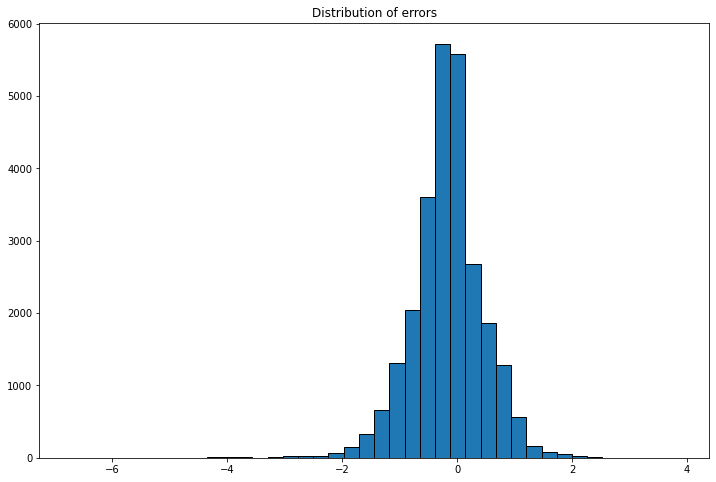

In [101]:
plt.figure(figsize=(12, 8))
plt.hist(pivoted.res, bins=40, edgecolor='black')
plt.title('Distribution of errors')
plt.show()

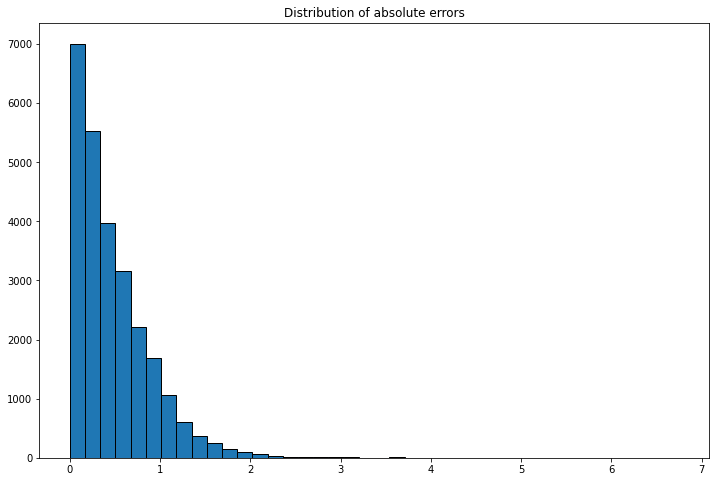

In [102]:
plt.figure(figsize=(12, 8))
plt.hist(pivoted.res_abs, bins=40, edgecolor='black')
plt.title('Distribution of absolute errors')
plt.show()

In [103]:
pivoted.res_abs.describe()

count    26295.000000
mean         0.476812
std          0.445463
min          0.000020
25%          0.157018
50%          0.360460
75%          0.677301
max          6.743475
Name: res_abs, dtype: float64

## Sequence Prediction

In [104]:
# Number of lags (hours back) to use for models
lag = 168

# Steps ahead to forecast 
n_ahead = 24

# Share of obs in testing 
test_share = 0.1

# Epochs for training
epochs = 20

# Batch size 
batch_size = 512

# Learning rate
lr = 0.001

# Number of neurons in LSTM layer
n_layer = 10

In [105]:
X, Y = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead)

n_ft = X.shape[2]

In [106]:
# Spliting into train and test sets 
Xtrain, Ytrain = X[0:int(X.shape[0] * (1 - test_share))], Y[0:int(X.shape[0] * (1 - test_share))]
Xval, Yval = X[int(X.shape[0] * (1 - test_share)):], Y[int(X.shape[0] * (1 - test_share)):]

print(f"Shape of training data: {Xtrain.shape}")
print(f"Shape of the target data: {Ytrain.shape}")

print(f"Shape of validation data: {Xval.shape}")
print(f"Shape of the validation target data: {Yval.shape}")

Shape of training data: (236520, 168, 6)
Shape of the target data: (236520, 24)
Shape of validation data: (26280, 168, 6)
Shape of the validation target data: (26280, 24)


In [108]:
seq_model = NNMultistepModel(
    X=Xtrain,
    Y=Ytrain,
    n_outputs=n_ahead,
    n_lag=lag,
    n_ft=n_ft,
    n_layer=n_layer,
    batch=batch_size,
    epochs=epochs, 
    lr=lr,
    Xval=Xval,
    Yval=Yval,
)

In [109]:
seq_model.model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 168, 6)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                680       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
Total params: 944
Trainable params: 944
Non-trainable params: 0
_________________________________________________________________


In [110]:
seq_history = seq_model.train()

Epoch 1/20
462/462 [==============================] - 68s 142ms/step - loss: 149.6529 - val_loss: 0.7919
Epoch 2/20
462/462 [==============================] - 67s 145ms/step - loss: 0.7078 - val_loss: 0.5708
Epoch 3/20
462/462 [==============================] - 47s 102ms/step - loss: 0.5753 - val_loss: 0.4985
Epoch 4/20
462/462 [==============================] - 49s 105ms/step - loss: 0.5112 - val_loss: 0.4551
Epoch 5/20
462/462 [==============================] - 48s 104ms/step - loss: 0.4726 - val_loss: 0.4325
Epoch 6/20
462/462 [==============================] - 48s 103ms/step - loss: 0.4542 - val_loss: 0.4169
Epoch 7/20
462/462 [==============================] - 47s 102ms/step - loss: 0.4329 - val_loss: 0.3990
Epoch 8/20
462/462 [==============================] - 48s 103ms/step - loss: 0.4113 - val_loss: 0.3882
Epoch 9/20
462/462 [==============================] - 47s 102ms/step - loss: 0.4026 - val_loss: 0.3792
Epoch 10/20
462/462 [==============================] - 47s 101ms/step -

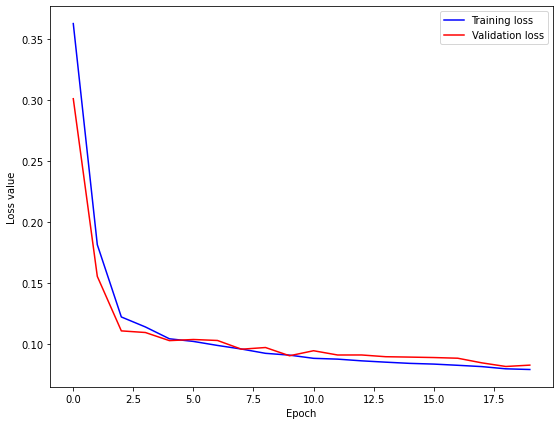

In [111]:
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

n_epochs = range(len(loss))

plt.figure(figsize=(9, 7))
plt.plot(n_epochs, loss, 'r', label='Training loss', color='blue')
if val_loss is not None:
    plt.plot(n_epochs, val_loss, 'r', label='Validation loss', color='red')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

In [112]:
# Forecasting on all the samples in the validation set 
forecast = seq_model.predict(Xval)

ValueError: ignored

In [ ]:
fig, axes = plt.subplots(
    nrows=4, 
    ncols=2, 
    figsize=(15, 15), 
    facecolor="w", 
    edgecolor="k"
)

indexes = random.sample(range(len(forecast)), 8)

for i, index in enumerate(indexes):
    
    yhat = forecast[index]
    y = Yval[index]

    frame = pd.concat([
        pd.DataFrame({'day': range(len(y)), 'temp': y, 'type': 'original'}),
        pd.DataFrame({'day': range(len(y)), 'temp': yhat, 'type': 'forecast'})
    ])
    
    frame['temp'] = [(x * train_std['temp']) + train_mean['temp'] for x in frame['temp']]
    
    sns.lineplot(x='day', y='temp', ax = axes[i // 2, i % 2], data=frame, hue='type', marker='o')
        
plt.tight_layout()

plt.show()

In [ ]:
# Calculating the total average absolute error 
error = 0 
n = 0
residuals = []

for i in range(Yval.shape[0]):
    true = Yval[i]
    hat = forecast[i]
    n += len(true)
    
    true = np.asarray([(x * train_std['temp']) + train_mean['temp'] for x in true])
    hat = np.asarray([(x * train_std['temp']) + train_mean['temp'] for x in hat])
    
    residual = true - hat
    residuals.append(residual)
    
    error += np.sum([abs(x) for x in true - hat]) 

print(f'Final average absolute error: {round(error / n, 2)} C')

In [ ]:
# Flattening the list of arrays of residuals
residuals = np.asarray(residuals).flatten().tolist()
abs_residuals = [abs(x) for x in residuals]

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=40, edgecolor='black')
plt.title('Distribution of errors - 24 hour forecast')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(abs_residuals, bins=40, edgecolor='black')
plt.title('Distribution of errors - 24 hour forecast - absolute')
plt.show()

In [ ]:
print(f"Median absoulte error: {round(np.median(abs_residuals), 2)} C")